# Online Data Science Courses
## Contexte
De nos jours, les plateformes d'éducation en ligne proposent un large choix de cours en ligne. Pour un débutant en auto-formation dans la Data Science, c'est des fois compliqué de choisir un cours pour commencer. Ces données ont été collectées pour répondre aux questions communes quand il faut choisir un nouveau sujet.
## Inspiration
La première intention derrière cette collecte de données est de découvrir quelle plateforme en ligne fournit la plus haute qualité d'enseignement. Aussi, de plus amples analyses peuvent révéler les réponses à des questions comme :
* Quelle plateforme a la meilleure moyenne ?
* Les cours les mieux notés sont-ils gratuits ou payants ?
* Quelle est la plateforme avec le plus de cours pour les débutants ?
* Pour les débutants, faut-il opter pour un cours gratuit ou un cours payant ?
* Quelle plateforme pour les niveaux intermédiaires et avancés ?
* Quels sont les cours les mieux notés ?

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.0,Coursera,False
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.0,Coursera,False
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.0,Coursera,False
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.0,Coursera,False
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.0,Coursera,False


On commence par s'occuper des types de chaque colonne afin d'avoir les données a bon format pour les futures opérations.

In [3]:
data.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
votes_count       float64
students_count    float64
level              object
duration          float64
platform           object
free                 bool
dtype: object

In [4]:
# id
data = data.rename(columns={"Unnamed: 0":"id"})

data['title'] = data['title'].astype('str')
data['author'] = data['author'].astype('str')
data['level'] = data['level'].astype('str')
data['platform'] = data['platform'].astype('str')

In [5]:
data['free'] = data['free'].astype('category')

In [6]:
# pour l'index, on prend id
data.set_index('id', inplace=True)

Maintenant on vérifie si le jeu de données contient des valeurs manquantes.

Text(0.5, 1.0, 'Valeurs manquantes')

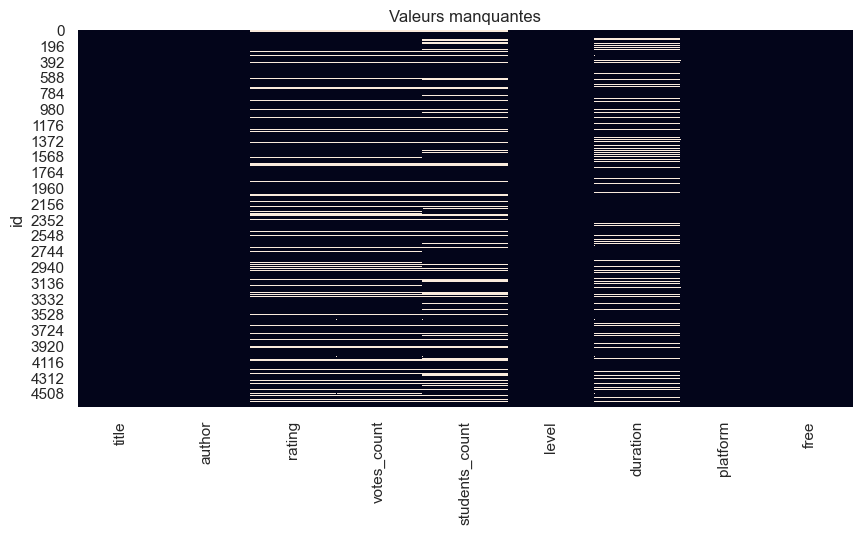

In [8]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
sns.heatmap(data.isnull(), cbar=False)
plt.title("Valeurs manquantes")

Sur cette heatmap on distingue clairement où se situent les valeurs manquantes. 

Pour traiter le cas de ces valeurs manquantes, les étapes suivantes vont être exécutées :
1. On crée une sauvegarde de notre jeu de données avant de faire un traitement ;
2. On supprime les valeurs manquantes de `data` pour obtenir le nouveau jeu `data_dna` ;
3. On compare la longueur de ces deux jeux de données et on constate une perte d'environ 1500 individus (ici des cours). Cela représente une perte de 27,7% des effectifs.
4. Afin de réduire les pertes de données, on examine quelles sont ces valeurs manquantes.

### Analyse des valeurs manquantes
En regardant les effectifs manquants pour chaque caractéristique par plateforme, on peut constater que :
* Certaines plateformes comme *edX* n'ont pas de notes `rating` et donc pas de compte du nombre de votes `votes_count` ;
* D'autres comme *PluralSight* ne semblent pas comptabiliser le nombre d'étudiant `students_count` par cours.

Or, pour l'objectif de l'analyse, ces données sont essentielles pour évaluer la qualité des cours.

Enfin, pour ce qui concerne la durée des cours `duration` qui est manquante par endroit, on peut écarter cette caractérique.

In [9]:
backup_data = data

In [11]:
data_dna = data.dropna()
print("data : ", len(data))
print("data_dna : ", len(data_dna))

data :  4683
data_dna :  3389


In [12]:
for plat in data.platform.unique():
    print("valeurs manquantes de {} : ".format(plat), data[data.platform == plat].isnull().sum(), "total : {}".format(len(data[data.platform == plat])))

valeurs manquantes de Coursera :  title               0
author              0
rating            171
votes_count       171
students_count    315
level               0
duration          653
platform            0
free                0
dtype: int64 total : 996
valeurs manquantes de edX :  title               0
author              0
rating            326
votes_count       326
students_count    188
level               0
duration            0
platform            0
free                0
dtype: int64 total : 326
valeurs manquantes de Udemy :  title             0
author            0
rating            0
votes_count       0
students_count    0
level             0
duration          0
platform          0
free              0
dtype: int64 total : 2072
valeurs manquantes de Pluralsight :  title               0
author              0
rating             88
votes_count        88
students_count    174
level               0
duration            0
platform            0
free                0
dtype: int64 total 

In [13]:
data_no_duration = data
del data_no_duration['duration']
data_no_duration_dna = data_no_duration.dropna()

In [14]:
print("data : {}".format(len(data)))
print("data_dna : {}".format(len(data_dna)))
print("data_no_duration : {}".format(len(data_no_duration)))
print("data_no_duration_dna : {}".format(len(data_no_duration_dna)))

data : 4683
data_dna : 3389
data_no_duration : 4683
data_no_duration_dna : 3789


En nettoyant ainsi le jeu de données, on ne perd que 19% des effectifs contre près de 28%.

## Analyse

### Quelles plateformes proposent le plus de cours ?

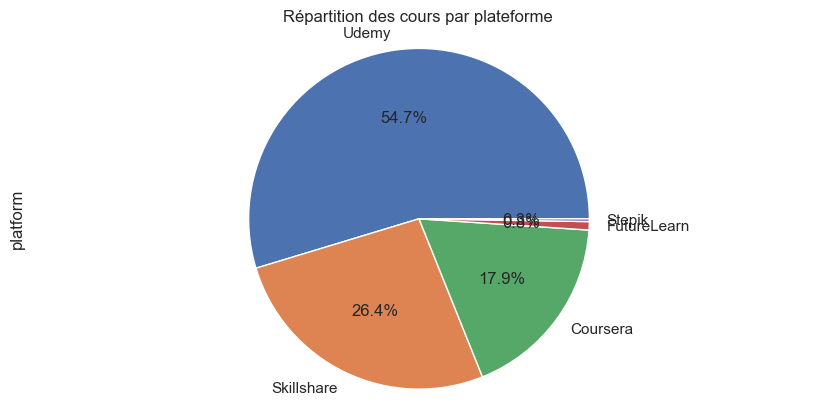

In [16]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna.platform.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%') # Diagramme en secteurs
plt.axis('equal') # Celle ligne assure que le pie chart est un cercle plutôt qu'une ellipse
plt.title('Répartition des cours par plateforme')
plt.show()

On remarque que c'est Udemy qui propose plus de la moitié des cours en ligne. Ce résultat n'est pas surprenant quand l'on sait que Udemy est la plateforme de cours en ligne n°1 au monde tous secreurs confondus.

### Quelle plateforme proposent le plus de cours gratuits ?

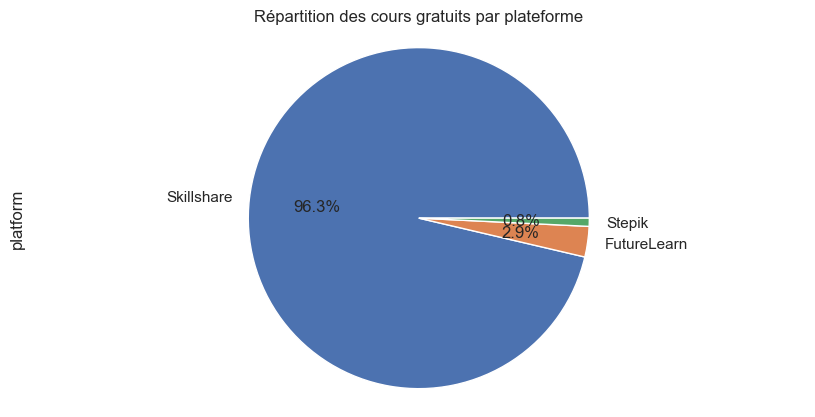

In [18]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna[data_no_duration_dna['free'] == True].platform.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition des cours gratuits par plateforme')
plt.show()

On constate cette fois-ci que c'est *Skillshare* qui possède le plus de cours gratuits.

### Quelle plateforme a le plus d'étudiants ?

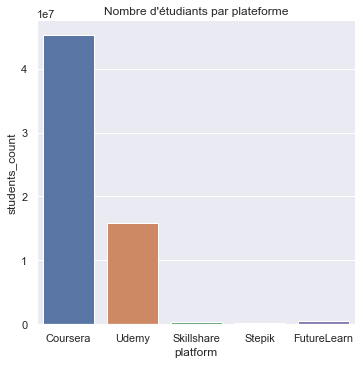

In [20]:
group = [] 
for plat in data_no_duration_dna.platform.unique():
    tmp = data_no_duration_dna.loc[data_no_duration['platform'] == plat]
    g = np.array([plat, tmp.students_count.sum()])
    group.append(g)

group_df = pd.DataFrame(group, columns=['platform', 'students_count'])
group_df['platform'] = group_df['platform'].astype('str')
group_df['students_count'] = group_df['students_count'].astype('float64')
sns.catplot(x='platform', y='students_count', kind="bar", data=group_df)
plt.title('Nombre d\'étudiants par plateforme')
plt.show()

On peut se poser la question de la pertinence de ce graphique. En effet, on comptabilise le nombre d'étudiant par cours et non par plateforme. N'ayant pas accès aux étudiants, on ne peut pas distinguer si un même étudiant a participé à 1, 2 ou 3 cours (il est donc comptabilisé entre 1 et 3 fois).

### Quelle plateforme a la meilleure moyenne sur ses cours ?

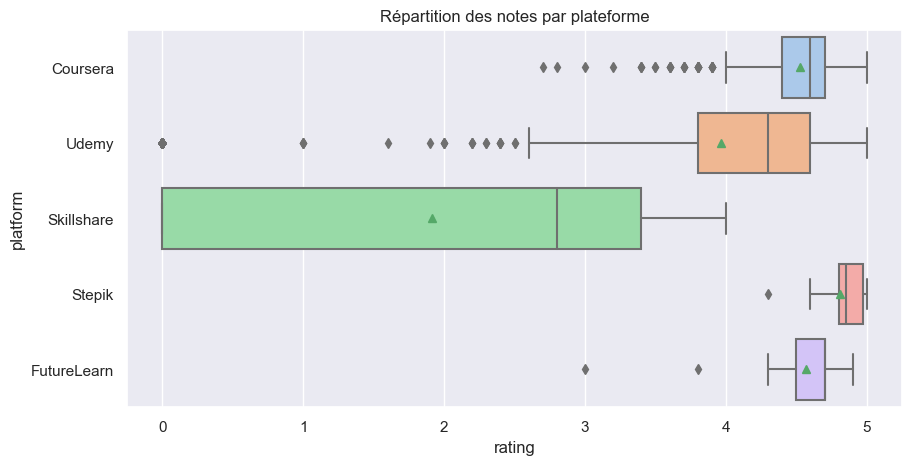

In [22]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="rating", y="platform", data=data_no_duration_dna, orient="h", showmeans=True, palette="pastel")
plt.title('Répartition des notes par plateforme')
plt.show()

Lorsque l'on regarde le 1er graphique, on constate que ce sont les plateformes *Futurelearn* et *Stepik* qui ont les meilleures évaluations.

Si on regarde sur les plateformes avec plus de cours comme *Udemy*, on peut constater que :
* plus de la moitié des cours ont une note supérieure à la moyenne du site ;
* 50% des cours sont notés entre 3.8 et 4.6 ;

Si on s'attarde sur la plateforme *Coursera*, à part quelques rares exceptions, tous ses cours ont au moins une note de 4/5.

Pour le cas de *Skillshare*, les cours concernant la data science sont les plus mauvaises de l'ensemble des plateformes. On peut ajouter qu'au départ, *Skillshare* est une plateforme à destination des créatifs et a une majorité de ses cours consacrés à des disciplines plus artistiques que la programmation.

### Les cours les mieux notés sont-ils payants ou gratuits ?

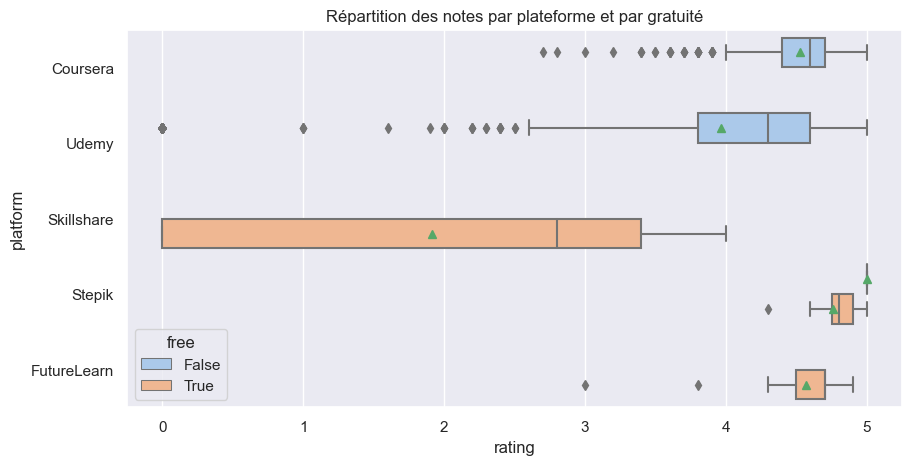

In [24]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="rating", y="platform", hue="free", data=data_no_duration_dna, orient="h", 
                 showmeans=True, palette="pastel")
plt.title('Répartition des notes par plateforme et par gratuité')
plt.show()

On constate que les cours cités au-dessus pour les plateformes *Udemy* et *Coursera* sont payants.

Pour *FutureLearn*, les cours sont en effet gratuit mais passer sur un plan "prenium" permet d'avoir plus de flexibilité sur l'utilisation des cours, pour voir la même flexibilité que pour *Udemy* et *Coursera*, les cours peuvent alors être considérés comme payants.

*Stepik* possède, elle, un plan entièrement gratuit.


### Quelle est la plateforme avec le plus de cours pour les débutants ?


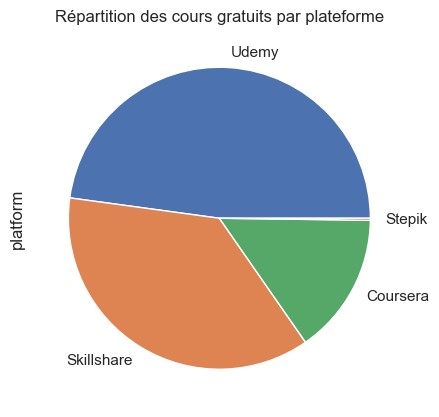

In [25]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
data_no_duration_dna[data_no_duration_dna['level'] == 'Beginner'].platform.value_counts(normalize=True).plot(kind='pie')
plt.title('Répartition des cours gratuits par plateforme')
plt.show()

C'est *Udemy* qui propose le plus de cours à destination des débutants, ce resultat n'est pas surprenant puisque c'est cette plateforme qui comptabilise le plus de cours.
### Est-il judicieux de prendre un cours payant lorsque l'on est débutant ?

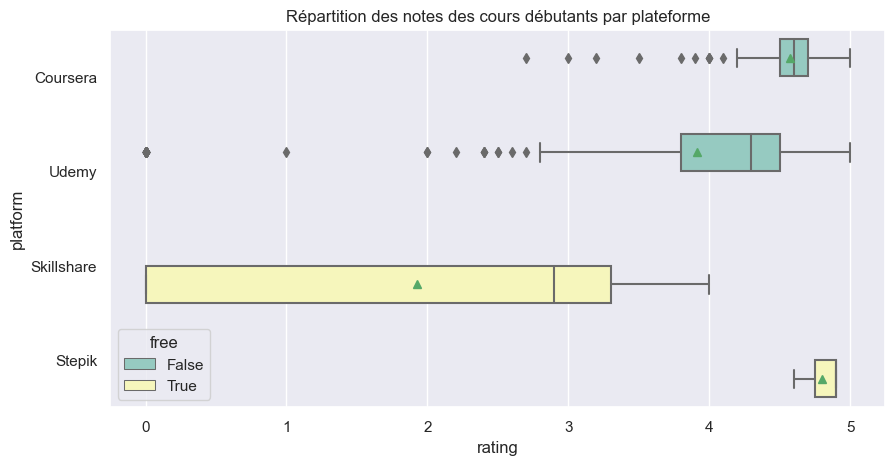

In [27]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
masque = (data_no_duration_dna["level"] == "Beginner")
ax = sns.boxplot(x="rating", y="platform", hue="free", data=data_no_duration_dna[masque], 
                 orient="h", showmeans=True, palette="Set3")
plt.title('Répartition des notes des cours débutants par plateforme')
plt.show()

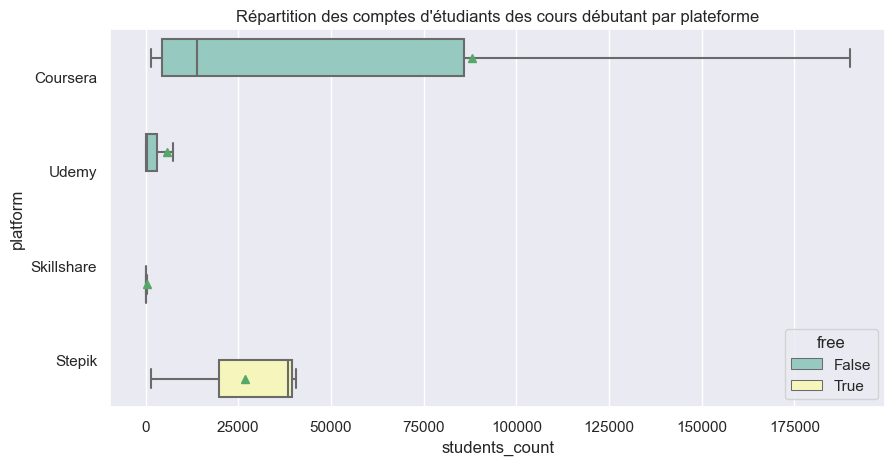

In [28]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
masque = (data_no_duration_dna["level"] == "Beginner")
ax = sns.boxplot(x="students_count", y="platform", hue="free", data=data_no_duration_dna[masque], 
                 orient="h", showmeans=True, showfliers=False, palette="Set3")
plt.title('Répartition des comptes d\'étudiants des cours débutant par plateforme')
plt.show()

Par rapport à l'évaluation du cours, on ne peut pas vraiment dire qu'il vaut mieux prendre un cours gratuit qu'un cours payants. On peut quand même constater que deux plateformes se démarquent :
* pour les cours **payants** : Coursera ;
* pour les cours **gratuits** : Stepik.

Ces résultats sont soutenus par le nombre d'étudiant que ces cours ont. (cf. le 2ème graphique)

### Qu'en est-il du choix des plateformes pour les niveaux *intermédiaire* et *avancé* ?

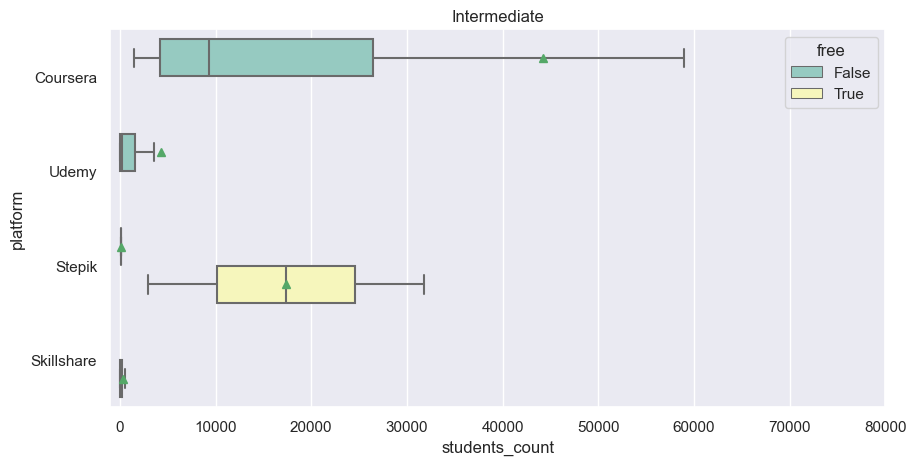

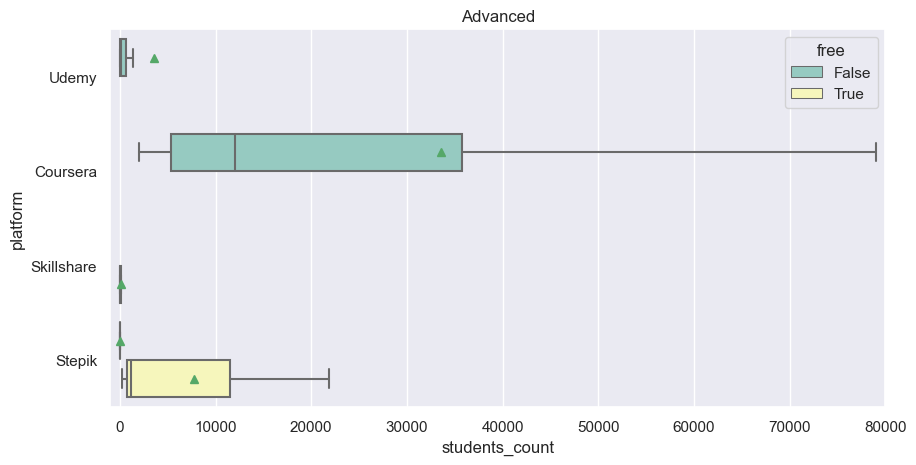

In [29]:
for lvl in data_no_duration_dna.level.unique():
    if((lvl != 'Beginner') & (lvl != 'Mixed')):
        fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
        masque = (data_no_duration_dna["level"] == lvl)
        ax = sns.boxplot(x="students_count", y="platform", hue="free", data=data_no_duration_dna[masque], orient="h", showmeans=True, showfliers=False, palette="Set3")
        ax.set_xlim(-1000, 80000)
        plt.title(lvl)
        plt.show()

De la même manière que précédemment, ce sont les plateformes *Coursera* et *Stepik* qui se démarquent repectivement sur les cours payants et gratuits.

### Quels sont les 10 cours les mieux notés ?
#### Tous niveaux confondus

In [32]:
data_no_duration_dna.sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
240,Want to be a Big Data Scientist?,"V2 Maestros, LLC",5.0,964.0,12523.0,Beginner,Udemy,False
345,Generate and visualize data in Python and MATLAB,Mike X Cohen,5.0,311.0,19595.0,Mixed,Udemy,False
2468,Machine Learning | Python ile Makine Öğrenmesi (),Devkod Akademi,5.0,94.0,374.0,Mixed,Udemy,False
1309,Matemática para Data Science - Pré-Cálculo,"Rafael F. V. C. Santos, Ph.D.",5.0,80.0,512.0,Mixed,Udemy,False
458,Python Temelleri ve Python ile Görüntü İşleme ...,Yılmaz Alaca,5.0,52.0,252.0,Mixed,Udemy,False
1731,Data Science with R and Python,Oak Academy,5.0,28.0,115.0,Mixed,Udemy,False
891,Python Data Analysis and Data Science Essentials.,Fanuel Mapuwei,5.0,26.0,893.0,Beginner,Udemy,False
2756,Introduction to Predictive Modeling,University of Minnesota,5.0,24.0,1700.0,Mixed,Coursera,False
4142,Build Real World Data Science & Machine Learni...,TheMachineLearning.Org .,5.0,22.0,420.0,Mixed,Udemy,False


#### Niveau débutant

In [31]:
data_no_duration_dna[data_no_duration_dna["level"] == "Beginner"].sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
240,Want to be a Big Data Scientist?,"V2 Maestros, LLC",5.0,964.0,12523.0,Beginner,Udemy,False
891,Python Data Analysis and Data Science Essentials.,Fanuel Mapuwei,5.0,26.0,893.0,Beginner,Udemy,False
4673,Learn To Build Powerful AI Chatbots From Scrat...,Sufa Digital Media,5.0,17.0,353.0,Beginner,Udemy,False
1491,Introduction to Machine Learning for Begineers...,Aakash Singh,5.0,10.0,12.0,Beginner,Udemy,False
3580,Network Analytics for Business,HSE University,5.0,7.0,1700.0,Beginner,Coursera,False
1638,AI Product Management,Duke University,5.0,6.0,1500.0,Beginner,Coursera,False
3563,Corso pratico di Pandas e Python con esempi pe...,Mirco Baragiani,5.0,5.0,5.0,Beginner,Udemy,False
2396,R-Analyst - Lerne die statistische Programmier...,Christian Müller-Kett,5.0,4.0,4.0,Beginner,Udemy,False
4212,Álgebra Linear com R para Machine Learning e M...,Luciano Galdino,5.0,4.0,33.0,Beginner,Udemy,False


#### Niveau débutant et gratuit

In [33]:
data_no_duration_dna[(data_no_duration_dna["level"] == "Beginner") & (data_no_duration_dna["free"] == True)].sort_values(by=["rating", "votes_count"], ascending=False).head(10)

,title,author,rating,votes_count,students_count,level,platform,free
id,,,,,,,,
3679,Analyzing data in R,Bioinformatics Institute,4.9,397.0,40584.0,Beginner,Stepik,True
1853,Probability Theory,Alexey Karachev,4.9,14.0,1462.0,Beginner,Stepik,True
2330,Introduction to Statistics,Bioinformatics Institute,4.6,56.0,38386.0,Beginner,Stepik,True
4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,Skillshare,True
1812,Python for Absolute Beginners - Learn Python i...,Andreas Exadaktylos,4.0,50.0,425.0,Beginner,Skillshare,True
1341,Python for Absolute Beginners,Ali Hamdan,4.0,17.0,69.0,Beginner,Skillshare,True
2304,Computer Science: DATA STRUCTURES (Java),Scott Reese,4.0,9.0,217.0,Beginner,Skillshare,True
1549,Machine Learning for beginners with project,Aakash Singh,4.0,8.0,20.0,Beginner,Skillshare,True
3943,T-SQL In Two Hours,Tim Smith,4.0,7.0,128.0,Beginner,Skillshare,True


### Quels sont les mots les plus récurrents dans les titres des cours ? 

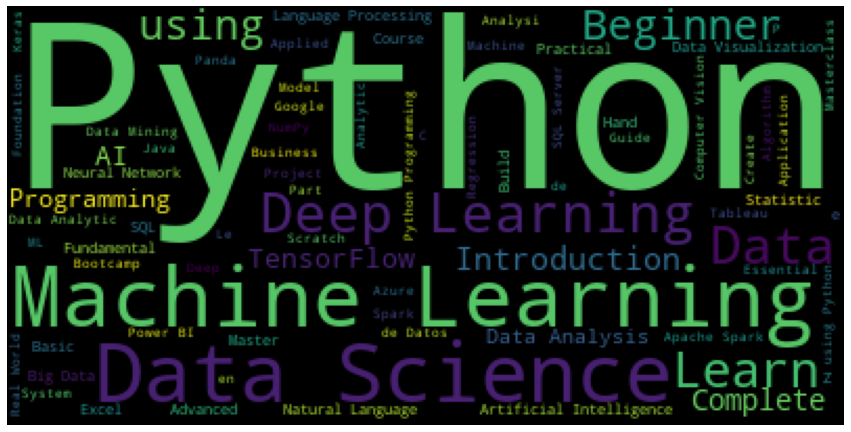

In [38]:
from wordcloud import WordCloud
plt.figure(figsize = (15, 15))
wordcloud = WordCloud(max_words = 1000, max_font_size = 120, random_state = 42).generate(str(data_no_duration_dna['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()